In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
from prophet import Prophet

In [3]:
df = pd.read_csv('train.csv', parse_dates=True)

In [4]:
df

,date,sleep_hours
0,2015-02-19,6.400000
1,2015-02-20,7.583333
2,2015-02-21,6.350000
3,2015-02-22,6.500000
4,2015-02-23,8.916667
...,...,...
2349,2021-12-25,7.933333
2350,2021-12-26,3.850000
2351,2021-12-29,6.175000
2352,2021-12-30,5.158333


In [5]:
df.columns = ['ds','y']

In [6]:
df

,ds,y
0,2015-02-19,6.400000
1,2015-02-20,7.583333
2,2015-02-21,6.350000
3,2015-02-22,6.500000
4,2015-02-23,8.916667
...,...,...
2349,2021-12-25,7.933333
2350,2021-12-26,3.850000
2351,2021-12-29,6.175000
2352,2021-12-30,5.158333


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2354 non-null   object 
 1   y       2354 non-null   float64
dtypes: float64(1), object(1)
memory usage: 36.9+ KB


In [8]:
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2354 non-null   datetime64[ns]
 1   y       2354 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 36.9 KB


In [89]:
m = Prophet(seasonality_mode='additive')

In [90]:
m.fit(df.iloc[:-180,:])

00:23:13 - cmdstanpy - INFO - Chain [1] start processing
00:23:15 - cmdstanpy - INFO - Chain [1] done processing


In [91]:
future = m.make_future_dataframe(periods=180)

In [92]:
future

,ds
0,2015-02-19
1,2015-02-20
2,2015-02-21
3,2015-02-22
4,2015-02-23
...,...
2349,2021-12-21
2350,2021-12-22
2351,2021-12-23
2352,2021-12-24


In [93]:
df.iloc[:-180,:]

,ds,y
0,2015-02-19,6.400000
1,2015-02-20,7.583333
2,2015-02-21,6.350000
3,2015-02-22,6.500000
4,2015-02-23,8.916667
...,...,...
2169,2021-06-24,6.300000
2170,2021-06-25,6.450000
2171,2021-06-26,8.283333
2172,2021-06-27,6.516667


In [94]:
forecast = m.predict(future)

In [95]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-02-19,6.970213,5.488659,8.698628,6.970213,6.970213,0.027853,0.027853,0.027853,0.021069,0.021069,0.021069,0.006784,0.006784,0.006784,0.0,0.0,0.0,6.998066
1,2015-02-20,6.969546,5.437835,8.479227,6.969546,6.969546,0.021413,0.021413,0.021413,0.025284,0.025284,0.025284,-0.003871,-0.003871,-0.003871,0.0,0.0,0.0,6.990959
2,2015-02-21,6.968880,5.645348,8.761644,6.968880,6.968880,0.292398,0.292398,0.292398,0.304753,0.304753,0.304753,-0.012355,-0.012355,-0.012355,0.0,0.0,0.0,7.261278
3,2015-02-22,6.968213,5.406098,8.722527,6.968213,6.968213,0.126532,0.126532,0.126532,0.144880,0.144880,0.144880,-0.018347,-0.018347,-0.018347,0.0,0.0,0.0,7.094746
4,2015-02-23,6.967547,5.123515,8.288268,6.967547,6.967547,-0.238867,-0.238867,-0.238867,-0.217304,-0.217304,-0.217304,-0.021563,-0.021563,-0.021563,0.0,0.0,0.0,6.728680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2021-12-21,6.822352,4.857556,8.869003,5.637332,7.971254,-0.097654,-0.097654,-0.097654,-0.152677,-0.152677,-0.152677,0.055024,0.055024,0.055024,0.0,0.0,0.0,6.724699
2350,2021-12-22,6.822739,4.866695,8.865608,5.627458,7.975503,-0.059521,-0.059521,-0.059521,-0.126003,-0.126003,-0.126003,0.066483,0.066483,0.066483,0.0,0.0,0.0,6.763218
2351,2021-12-23,6.823126,4.955856,8.986386,5.620741,7.979753,0.099432,0.099432,0.099432,0.021069,0.021069,0.021069,0.078363,0.078363,0.078363,0.0,0.0,0.0,6.922558
2352,2021-12-24,6.823513,4.864624,8.968946,5.609894,7.992794,0.115697,0.115697,0.115697,0.025284,0.025284,0.025284,0.090414,0.090414,0.090414,0.0,0.0,0.0,6.939210


In [96]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [97]:
forecast[['ds','yhat_lower', 'yhat_upper','yhat']].tail(24)

,ds,yhat_lower,yhat_upper,yhat
2330,2021-12-02,5.025725,9.048561,6.971115
2331,2021-12-03,4.948739,8.887003,6.956968
2332,2021-12-04,5.302327,9.146451,7.218812
2333,2021-12-05,5.291842,8.974292,7.042334
2334,2021-12-06,4.778514,8.618944,6.664829
2335,2021-12-07,4.680097,8.734003,6.715649
2336,2021-12-08,4.826610,8.621296,6.730236
2337,2021-12-09,4.997990,8.899054,6.867108
2338,2021-12-10,4.914772,8.918103,6.863138
2339,2021-12-11,5.341631,9.123096,7.136527


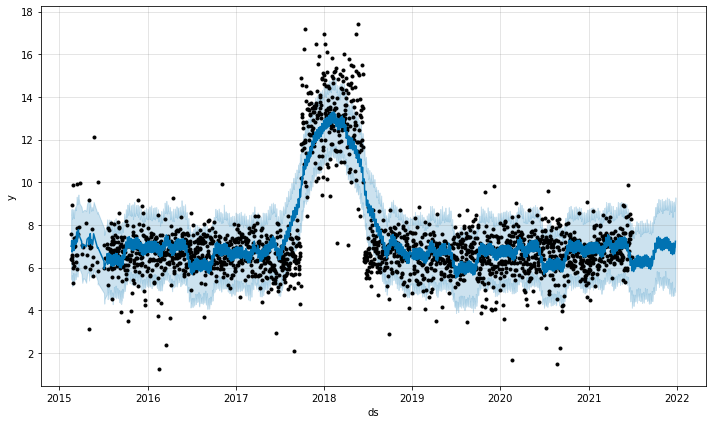

In [98]:
m.plot(forecast);

In [99]:
preds_1 = forecast['yhat'][-180:]

In [100]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [101]:
y_test = df['y'][-180:]

In [102]:
print(mean_squared_error(y_test,preds_1))

1.063396950408841


In [42]:
test = pd.read_csv('test.csv')

In [43]:
len(test)

419

In [67]:
m2 = Prophet()
m2.fit(df)
future = m.make_future_dataframe(periods=551+75)
future

00:17:12 - cmdstanpy - INFO - Chain [1] start processing
00:17:12 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,2015-02-19
1,2015-02-20
2,2015-02-21
3,2015-02-22
4,2015-02-23
...,...
2795,2023-03-12
2796,2023-03-13
2797,2023-03-14
2798,2023-03-15


In [66]:
pd.to_datetime('2023-03-16', format='%Y-%m-%d') - pd.to_datetime('2022-12-31', format='%Y-%m-%d')

Timedelta('75 days 00:00:00')

In [46]:
test

,date,sleep_hours
0,2022-01-01,1
1,2022-01-02,1
2,2022-01-03,1
3,2022-01-04,1
4,2022-01-05,1
...,...,...
414,2023-03-12,1
415,2023-03-13,1
416,2023-03-14,1
417,2023-03-15,1


In [68]:
forecast = m.predict(future)

In [69]:
forecast['yhat']

0       6.998066
1       6.990959
2       7.261278
3       7.094746
4       6.728680
          ...   
2795    7.491739
2796    7.160921
2797    7.254905
2798    7.308439
2799    7.479425
Name: yhat, Length: 2800, dtype: float64

In [70]:
sub = pd.read_csv('sample_submission.csv')

In [72]:
sub['sleep_hours'] = forecast['yhat']

In [74]:
#sub.to_csv('fbprophet-1.csv',index=False)